# Computer Vision

> Computer Vision is a field of artificial intelligence that enables computers to interpret and make decisions based on visual data from the world, such as images and videos. The primary goal is to enable machines to understand and process visual data in a way that is similar to human vision.

# OpenCV

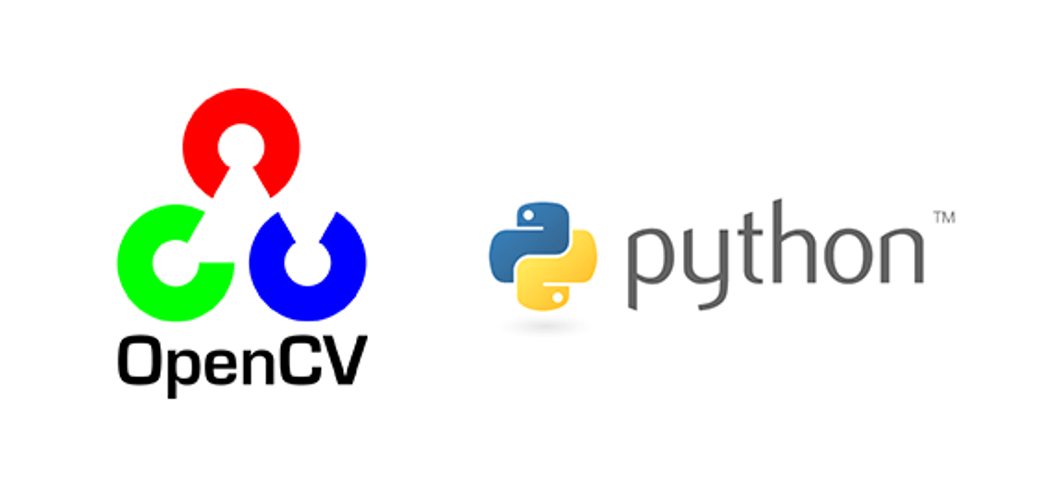

> OpenCV (Open Source Computer Vision Library) is a comprehensive open-source library designed for computer vision and machine learning applications. It offers a rich set of tools and algorithms for tasks such as image and video processing, feature detection, object tracking, and deep learning. With support for various programming languages including Python, C++, and Java, OpenCV is widely employed across industries ranging from robotics and autonomous vehicles to healthcare and entertainment.

OpenCV provides a wide range of functionalities for various computer vision tasks including:

* Image and video processing
* Object detection and recognition
* Facial recognition
* Feature detection and description
* Image segmentation
* Camera calibration and 3D reconstruction
* Machine learning algorithms for classification, regression, clustering, and more
* Deep learning module for utilizing pre-trained deep neural networks

# Image

> A digital image is a numeric representation of a two dimensional image. It is composed of pixels, which are the smallest addressable elements 
> of a picture. Each pixel has its own value, which represents a color or intensity.

**Representation of Digital Images:** Digital images are represented in a matrix form, where 
each element of the matrix corresponds to a pixel in the image. The value of each pixel 
represents the color or intensity of that pixel. For grayscale images, pixel values range from 
0 to 255, with 0 representing black and 255 representing white. For color images, each 
pixel is typically represented by three values, corresponding to the red, green, and blue 
components of the color.

**Image Compression:** Image compression is the process of reducing the size of an image 
file without significantly affecting its quality. There are two types of image compression: 
lossless and lossy. Lossless compression reduces the file size without losing any 
information, while lossy compression reduces the file size by discarding some information. 
Common image compression formats include JPEG, PNG, and GIF.JPEG is a widely used 
format that provides good compression but can result in loss of quality. PNG is a lossless 
format that provides good quality but larger file sizes. GIF is a format that supports 
animation but is limited to 256 colors. TIFF is a high-quality format that is often used in 
professional photography.

**Image Processing:** Image processing involves manipulating an image to improve its 
quality or extract information. Common image processing operations include filtering, 
enhancement, and segmentation. Filtering is used to remove noise or enhance certain 
features of an image. Enhancement techniques, such as contrast stretching and histogram 
equalization, are used to improve the visual quality of an image. Segmentation involves 
dividing an image into its constituent parts, such as objects and background.

**Applications of Digital Images:** Computer vision, digital photography, and medical imaging are just a few of the many uses for digital images. Digital pictures in medical imaging are used to identify and treat a range of illnesses. Patterns and objects are recognized using digital images in computer vision. Using digital photography, memories are captured and shared via digital photos.

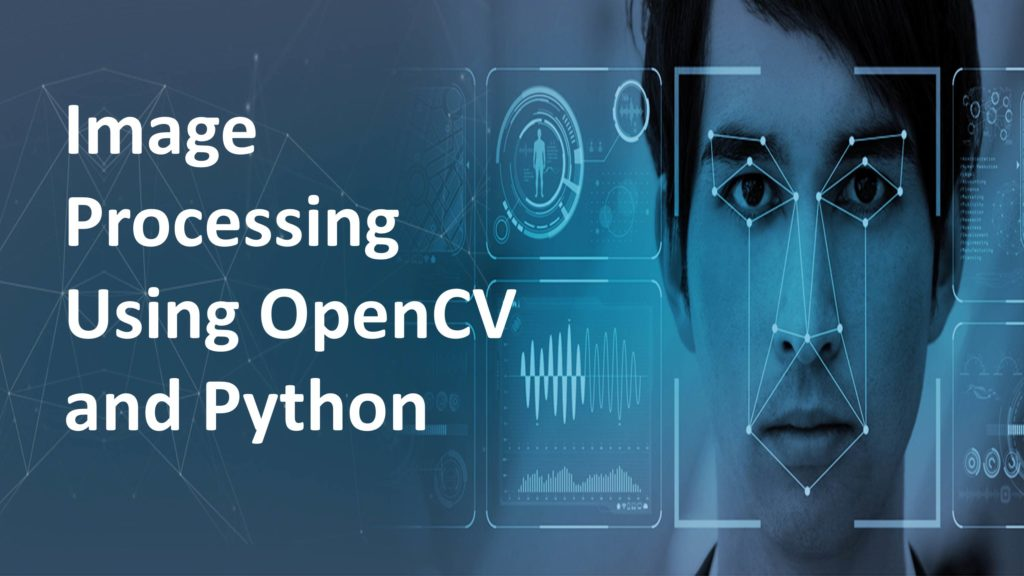

# Let's Explore Image Processing with OpenCV

Installing OpenCV

In [1]:
!pip install opencv-python

Importing all the important libary

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

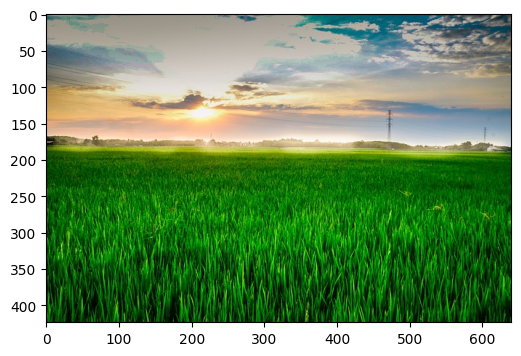

In [3]:
#Loading image threough matplotlib

plt.figure(figsize= (6,4))
rice_image = plt.imread("../input/rice-field/rice field.jpg")
plt.imshow(rice_image)
plt.show()

In [4]:
# print the size  of image
print("Image size (H, W, C) is:", rice_image.shape)

# print data-type of image
print("Data type of image is:", rice_image.dtype)

Image size (H, W, C) is: (424, 640, 3)
Data type of image is: uint8


**Loading images using OpenCV**
We can load grayscale images, color images or can also load images with Alpha channel.


**Syntax:**
val = cv2.imread( filename,flags )


**Flags:**
cv2.IMREAD_GRAYSCALE or 0: Loads image in grayscale mode.

cv2.IMREAD_COLOR or 1: Loads a color image. Any transparency of image will be neglected. It is the default flag.

cv2.IMREAD_UNCHANGED or -1: Loads image as such including alpha channel.

In [5]:
rice_gray = cv.imread("../input/rice-field/rice field.jpg",0)

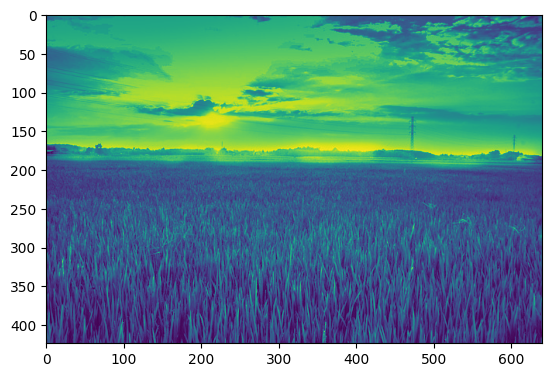

In [6]:
rice_gray
plt.imshow(rice_gray)

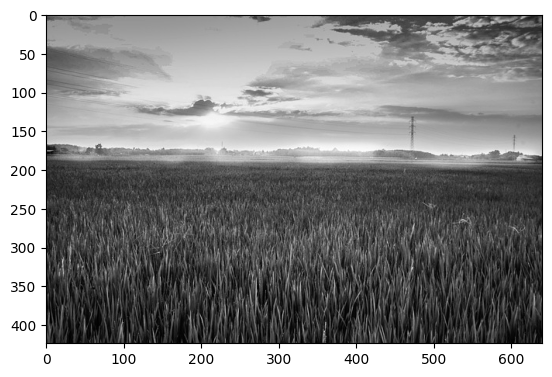

In [7]:
# Matplotlib uses different color maps and it's possible that the gray scale color map is not set.
# Set color map to gray scale for proper rendering.
plt.imshow(rice_gray, cmap="gray")

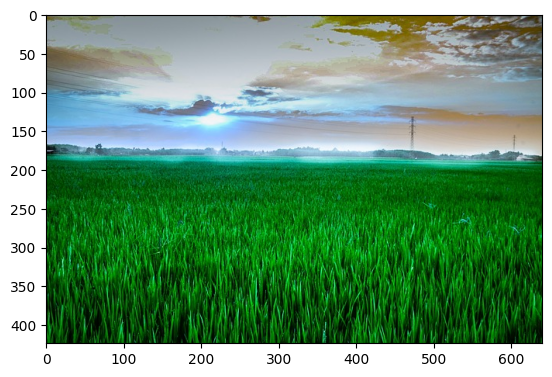

In [8]:
rice_color = cv.imread("../input/rice-field/rice field.jpg",1)
plt.imshow(rice_color)
#  What happened?

The color displayed above is different from the actual image. This is because matplotlib expects the image in RGB format whereas OpenCV stores images in BGR format. Thus, for correct display, we need to reverse the channels of the image.

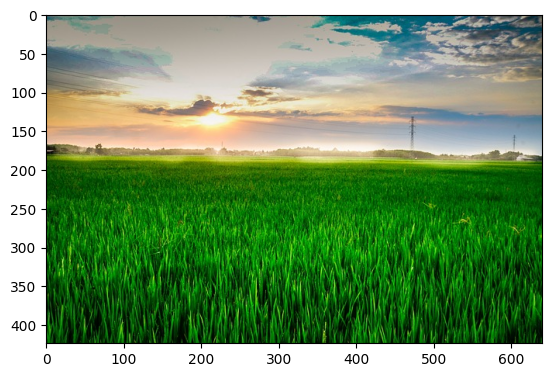

In [9]:
rice_color_reversed = rice_color[:, :, ::-1]
plt.imshow(rice_color_reversed)

# Splitting & Merging Color Channels

* cv2.split() Divides a multi-channel array into several single-channel arrays. 
* cv2.merge() Merges several arrays to make a single multi-channel array. All the input matrices must have the same size.

Text(0.5, 1.0, 'Merged Output')

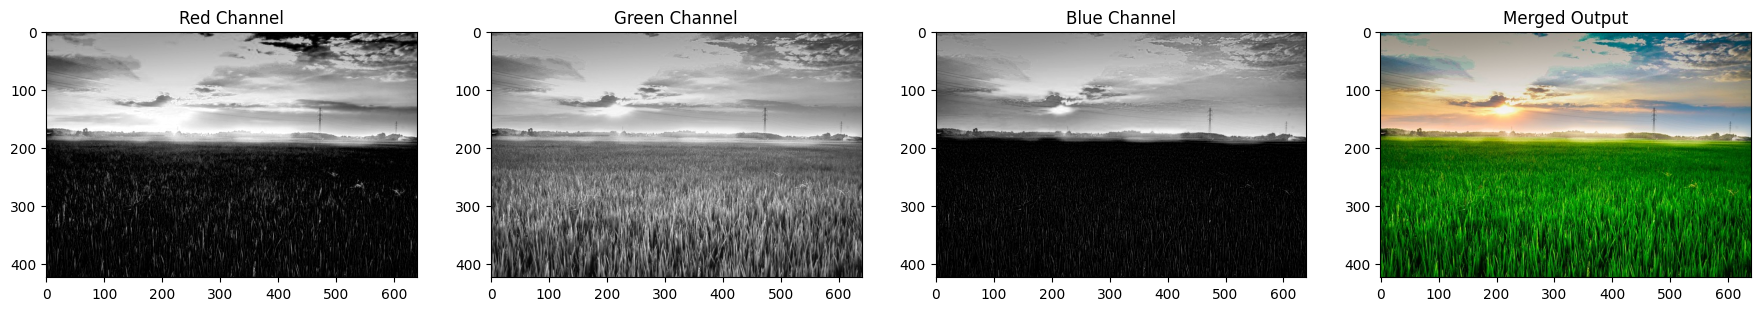

In [10]:
# Split the image into 3 channels
rice_color2 = rice_color_reversed.copy()

r,g,b = cv.split(rice_color2)

# Show the channels
plt.figure(figsize= (22,10))
plt.subplot(141);plt.imshow(r, cmap="gray");plt.title("Red Channel")
plt.subplot(142);plt.imshow(g, cmap="gray");plt.title("Green Channel")
plt.subplot(143);plt.imshow(b, cmap="gray");plt.title("Blue Channel")

# Merge the individual channels into a BGR image
rice_merged = cv.merge((b, g, r))

# Show the merged output
plt.subplot(144)
plt.imshow(rice_merged[:, :, ::-1])
plt.title("Merged Output")

# Converting into Different Color composition 

* cv2.cvtColor() Converts an image from one color space to another.

* Syntax:
val = cv2.cvtColor( filename, code )

Opencv Documentation for code: [https://docs.opencv.org/4.5.1/d8/d01/group__imgproc__color__conversions.html#ga4e0972be5de079fed4e3a10e24ef5ef0](http://)

Text(0.5, 1.0, 'After Converting')

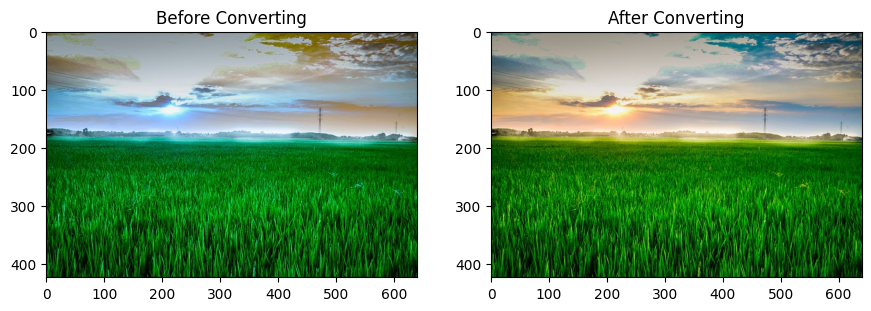

In [11]:
# OpenCV stores color channels in a differnet order than most other applications (BGR vs RGB).

plt.figure(figsize= (22,10))
plt.subplot(141);plt.imshow(rice_color);plt.title("Before Converting")
rice_rgb = cv.cvtColor(rice_color, cv.COLOR_BGR2RGB)
plt.subplot(142);plt.imshow(rice_rgb);plt.title("After Converting")


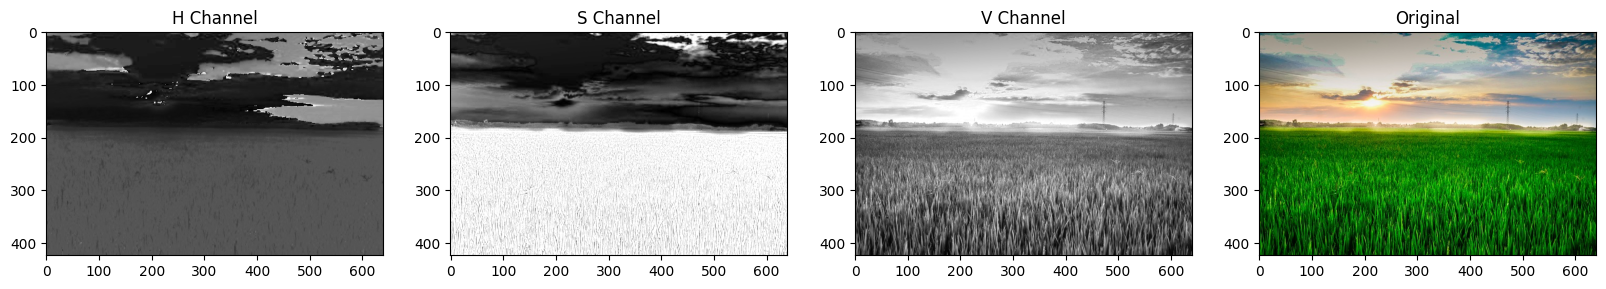

In [12]:
img_hsv = cv.cvtColor(rice_color, cv.COLOR_BGR2HSV)

# Split the image into the B,G,R components
h,s,v = cv.split(img_hsv)

# Show the channels
plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(h, cmap="gray");plt.title("H Channel");
plt.subplot(142);plt.imshow(s, cmap="gray");plt.title("S Channel");
plt.subplot(143);plt.imshow(v, cmap="gray");plt.title("V Channel");
plt.subplot(144);plt.imshow(rice_rgb);   plt.title("Original");

# Modifying the Channel

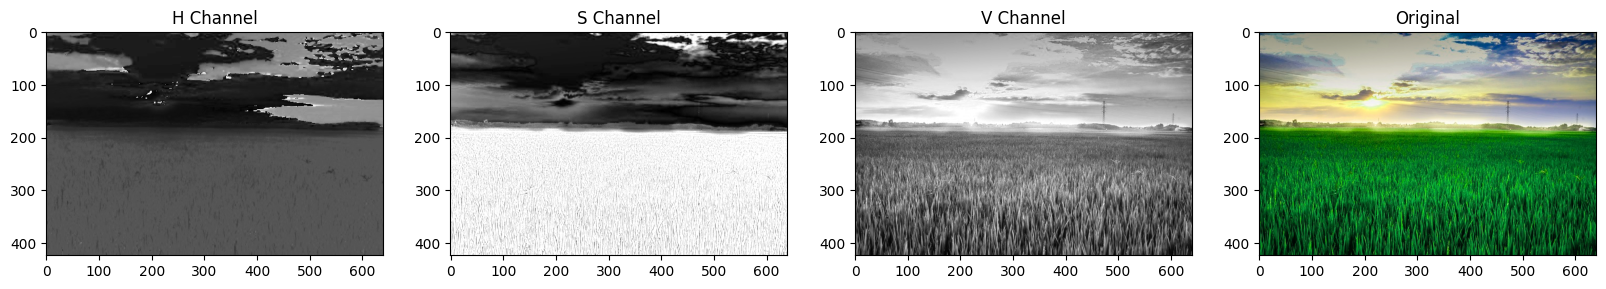

In [13]:
h_new = h + 10
rice_merged1 = cv.merge((h_new, s, v))
img_rgb = cv.cvtColor(rice_merged1, cv.COLOR_HSV2RGB)

# Show the channels
plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(h, cmap="gray");plt.title("H Channel");
plt.subplot(142);plt.imshow(s, cmap="gray");plt.title("S Channel");
plt.subplot(143);plt.imshow(v, cmap="gray");plt.title("V Channel");
plt.subplot(144);plt.imshow(img_rgb);   plt.title("Original");

# Saving Image

We use the function **cv2.imwrite()** with two arguments. The first one is the filename, second argument is the image object.

[Documentation link](https://docs.opencv.org/4.5.1/d8/d6a/group__imgcodecs__flags.html#ga292d81be8d76901bff7988d18d2b42ac)

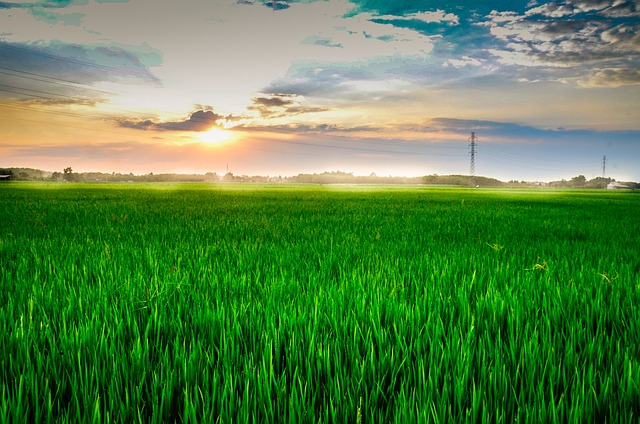

In [14]:
# save the image
cv.imwrite("Rice_Field.png", rice_color)

Image(filename='Rice_Field.png') 

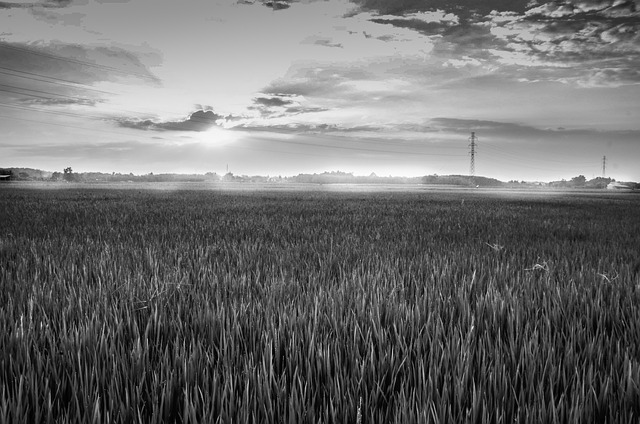

In [15]:
# save the image
cv.imwrite("Rice_Field_gray.png", rice_gray)

Image(filename='Rice_Field_gray.png')

img_bgr shape (H, W, C) is: (424, 640, 3)


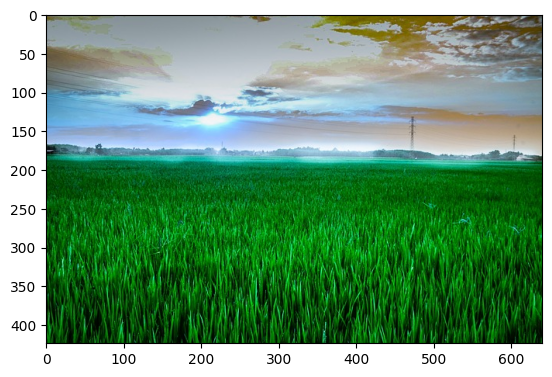

In [16]:
# read the image as Color
img_bgr = cv.imread("/kaggle/working/Rice_Field.png", cv.IMREAD_COLOR)
print("img_bgr shape (H, W, C) is:", img_bgr.shape)
plt.imshow(img_bgr)

img_gry shape (H, W) is: (424, 640)


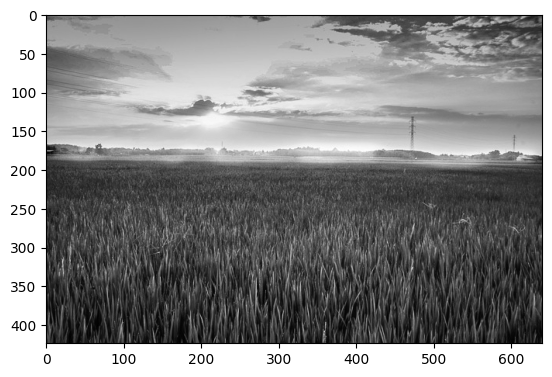

In [17]:
# read the image as Grayscaled
img_gry = cv.imread("/kaggle/working/Rice_Field.png", cv.IMREAD_GRAYSCALE)
print("img_gry shape (H, W) is:", img_gry.shape)
plt.imshow(img_gry,cmap="gray")

# Thank You